In [67]:
import pandas as pd
file_path = 'registration_data_training.csv'
df_registration = pd.read_csv(file_path)
file_path2 = 'previous_lives_training_data.csv'
df_previous_lives = pd.read_csv(file_path2)

In [68]:
df_registration.head(5)

,user_id,registration_time_utc,registration_platform_specific,registration_country,registration_store,registration_season_day,registration_channel_detailed,registration_device_type,registration_device_manufacturer,session_count,...,rests_stash,rests_spent,treatments_spent,morale_spent,money_stash,avg_stars_top_11_players,avg_stars_top_3_players,avg_age_top_11_players,training_count,days_active_first_28_days_after_registration
0,5,2024-05-25 01:26:48.000,iOS Phone,France,AppStore,7,Organic,Phone,Apple,1,...,524,0,0,0,1066076772,4.721867,5.451511,22.0,0,0
1,7,2024-06-14 20:09:31.000,Android Phone,Turkey,GooglePlay,27,Unknown,Phone,Xiaomi,1,...,962,0,0,0,1224446429,4.911067,5.303822,22.0,1,0
2,13,2024-05-31 09:06:51.000,Android Phone,Belarus,GooglePlay,13,Organic,Phone,Xiaomi,2,...,829,0,0,0,1221792142,5.018146,5.746889,24.0,3,0
3,23,2024-05-31 04:00:33.000,Android Phone,Indonesia,GooglePlay,13,Paid,Phone,OPPO,4,...,180,39,12,9,928112709,5.827455,6.692578,22.0,7,1
4,25,2024-06-15 19:56:05.000,iOS Phone,Egypt,AppStore,28,Organic,Phone,Apple,5,...,209,80,0,2,326553498,5.340412,5.775289,24.0,6,3


In [69]:
df_previous_lives.head(5)

,user_id,registration_date,registration_season_day,registration_country,registration_channel_detailed,registration_store,registration_platform_specific,is_payer_lifetime,days_active_lifetime,transaction_count_iap_lifetime,is_rewarded_video_watcher_lifetime
0,5,2022-04-21,26,France,Organic,AppStore,iOS Phone,False,1,0,False
1,5,2023-05-07,15,France,Paid,AppStore,iOS Phone,False,18,0,True
2,7,2022-04-06,11,Turkey,Organic,AppStore,iOS Phone,False,21,0,True
3,7,2023-02-06,9,Turkey,Organic,GooglePlay,Android Phone,False,2,0,False
4,7,2023-05-28,8,Turkey,Unknown,GooglePlay,Android Phone,False,1,0,False


In [70]:
# Grouping data by 'user_id'
grouped_df = df_previous_lives.groupby('user_id').agg(
    first_registration_date=('registration_date', 'min'),
    last_registration_date=('registration_date', 'max'),
    max_registration_season_day=('registration_season_day', 'max'),
    min_registration_season_day=('registration_season_day', 'min'),
    last_registration_season_day=('registration_season_day', 'last'),
    is_payer_lifetime=('is_payer_lifetime', 'max'),
    max_days_active_lifetime=('days_active_lifetime', 'max'),
    min_days_active_lifetime=('days_active_lifetime', 'min'),
    last_days_active_lifetime=('days_active_lifetime', 'last'),
    sum_days_active_lifetime=('days_active_lifetime', 'sum'),
    transaction_count_iap_lifetime=('transaction_count_iap_lifetime', 'sum'),
    is_rewarded_video_watcher_lifetime=('is_rewarded_video_watcher_lifetime', 'max'),
    number_of_previous_lives=('user_id', 'count'),
    ever_organic=('registration_channel_detailed', lambda x: 'Organic' in x.values ),
    ever_paid=('registration_channel_detailed', lambda x: 'Paid' in x.values),
    ever_appstpre=('registration_store', lambda x: 'AppStore' in x.values),
    ever_googleplay=('registration_store', lambda x: 'GooglePlay' in x.values)
).reset_index()


print(grouped_df)


       user_id first_registration_date last_registration_date  \
0            5              2022-04-21             2023-05-07   
1            7              2022-04-06             2023-05-28   
2           13              2022-10-18             2023-08-17   
3           23              2023-08-30             2023-08-30   
4           25              2022-08-24             2023-08-15   
...        ...                     ...                    ...   
49995   218943              2022-08-30             2023-10-03   
49996   218947              2022-05-30             2023-05-15   
49997   218948              2023-11-10             2023-11-10   
49998   218949              2022-10-15             2022-10-15   
49999   218956              2022-04-18             2024-02-14   

       max_registration_season_day  min_registration_season_day  \
0                               26                           15   
1                               11                            8   
2                 

In [71]:
# Merging the grouped DataFrame with the original DataFrame on 'user_id'
merged_df = df_registration.merge(grouped_df, on='user_id', suffixes=('', '_grouped'))

# Display the result
print(merged_df)


       user_id    registration_time_utc registration_platform_specific  \
0            5  2024-05-25 01:26:48.000                      iOS Phone   
1            7  2024-06-14 20:09:31.000                  Android Phone   
2           13  2024-05-31 09:06:51.000                  Android Phone   
3           23  2024-05-31 04:00:33.000                  Android Phone   
4           25  2024-06-15 19:56:05.000                      iOS Phone   
...        ...                      ...                            ...   
49995   218943  2024-05-26 13:45:01.000                      iOS Phone   
49996   218947  2024-05-29 08:54:43.000                  Android Phone   
49997   218948  2024-06-04 05:18:42.000                  Android Phone   
49998   218949  2024-05-27 01:57:37.000                  Android Phone   
49999   218956  2024-06-03 15:25:35.000                  Android Phone   

      registration_country registration_store  registration_season_day  \
0                   France           

In [72]:
# Check if 'merged_df' is loaded, and ensure the 'registration_country' column exists
if 'merged_df' in globals() and 'registration_country' in merged_df.columns:
    # Calculate the top 10 countries
    top_countries = (
        merged_df['registration_country']
        .value_counts()
        .head(10)
        .reset_index()
        .rename(columns={'index': 'Country', 'registration_country': 'Participants'})
    )
    
    # Display the results
    print("Top 10 Registration Countries by Number of Participants:")
    print(top_countries)
else:
    print("Please ensure 'merged_df' is defined and contains a 'registration_country' column.")


Top 10 Registration Countries by Number of Participants:
     Participants  count
0       Indonesia  12018
1          Turkey   4472
2          Brazil   3067
3         Germany   2130
4  United Kingdom   1700
5          France   1619
6        Thailand   1544
7           Italy   1339
8           Spain   1236
9        Malaysia   1162


In [73]:
try:
    import pycountry_convert as pc
except ImportError:
    print("Please install the 'pycountry_convert' package using: pip install pycountry-convert")

def map_country_to_region_with_threshold(country_name, country_counts):
    try:
        # If the country has more than 400 people, return the exact country name
        if country_counts[country_name] > 400:
            return country_name
        
        # Convert country name to alpha-2 country code
        country_code = pc.country_name_to_country_alpha2(country_name)
        
        # Map country code to continent
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        
        # Convert continent code to region name
        continent_name = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        
        # Return Other_'continent_name' for less populated countries
        return f"Other_{continent_name[continent_code]}"
    except KeyError:
        return 'Other_Unknown'  # If the country or continent is unknown

# Count occurrences of each country
country_counts = merged_df['registration_country'].value_counts()

# Apply the function with threshold logic
merged_df['region'] = merged_df['registration_country'].apply(lambda x: map_country_to_region_with_threshold(x, country_counts))

# Check unique regions created
unique_regions = merged_df['region'].unique()
print("Unique regions:", unique_regions)



Unique regions: ['France' 'Turkey' 'Other_Europe' 'Indonesia' 'Egypt' 'Spain' 'Brazil'
 'Germany' 'Other_Asia' 'Malaysia' 'Poland' 'Romania' 'Israel' 'Italy'
 'Greece' 'Saudi Arabia' 'Other_Unknown' 'India' 'Other_Africa'
 'United States' 'United Kingdom' 'Czech Republic' 'Argentina' 'Serbia'
 'Portugal' 'Thailand' 'Other_South America' 'Other_North America'
 'Mexico' 'Other_Oceania']


In [74]:
# Count the number of occurrences for each region
region_counts = merged_df['region'].value_counts()

# Display the counts for each region
print(region_counts)


region
Indonesia              12018
Turkey                  4472
Other_Europe            3885
Brazil                  3067
Other_Asia              2724
Germany                 2130
Other_Africa            1881
United Kingdom          1700
France                  1619
Thailand                1544
Other_South America     1409
Italy                   1339
Spain                   1236
Malaysia                1162
Poland                  1160
United States            951
Argentina                852
Greece                   745
Egypt                    728
Romania                  680
Israel                   651
Portugal                 590
Mexico                   566
Czech Republic           559
India                    533
Other_North America      524
Serbia                   445
Saudi Arabia             437
Other_Oceania            241
Other_Unknown            152
Name: count, dtype: int64


In [75]:
# Convert registration_time_utc, first_registration_date, and last_registration_date to datetime if not already done
merged_df['registration_time_utc'] = pd.to_datetime(merged_df['registration_time_utc'])
merged_df['first_registration_date'] = pd.to_datetime(merged_df['first_registration_date'])
merged_df['last_registration_date'] = pd.to_datetime(merged_df['last_registration_date'])

# Calculate days_from_first_registration and days_from_last_registration
merged_df['days_from_first_registration'] = (merged_df['registration_time_utc'] - merged_df['first_registration_date']).dt.days
merged_df['days_from_last_registration'] = (merged_df['registration_time_utc'] - merged_df['last_registration_date']).dt.days

# Display the new columns to verify
print(merged_df[['user_id', 'registration_time_utc', 'first_registration_date', 
                 'last_registration_date', 'days_from_first_registration', 'days_from_last_registration']].head())


   user_id registration_time_utc first_registration_date  \
0        5   2024-05-25 01:26:48              2022-04-21   
1        7   2024-06-14 20:09:31              2022-04-06   
2       13   2024-05-31 09:06:51              2022-10-18   
3       23   2024-05-31 04:00:33              2023-08-30   
4       25   2024-06-15 19:56:05              2022-08-24   

  last_registration_date  days_from_first_registration  \
0             2023-05-07                           765   
1             2023-05-28                           800   
2             2023-08-17                           591   
3             2023-08-30                           275   
4             2023-08-15                           661   

   days_from_last_registration  
0                          384  
1                          383  
2                          288  
3                          275  
4                          305  


In [76]:
# Removing all date columns from the DataFrame
merged_df = merged_df.drop(columns=['registration_time_utc', 'first_registration_date', 'last_registration_date'], errors='ignore')

# Display the DataFrame to verify date columns have been removed
print(merged_df.head())


   user_id registration_platform_specific registration_country  \
0        5                      iOS Phone               France   
1        7                  Android Phone               Turkey   
2       13                  Android Phone              Belarus   
3       23                  Android Phone            Indonesia   
4       25                      iOS Phone                Egypt   

  registration_store  registration_season_day registration_channel_detailed  \
0           AppStore                        7                       Organic   
1         GooglePlay                       27                       Unknown   
2         GooglePlay                       13                       Organic   
3         GooglePlay                       13                          Paid   
4           AppStore                       28                       Organic   

  registration_device_type registration_device_manufacturer  session_count  \
0                    Phone                        

In [77]:
# Get the unique values and their counts for the 'registration_device_manufacturer' column
device_manufacturer_counts = merged_df['registration_device_manufacturer'].value_counts()

# Display the counts for the first 15 unique device manufacturers
print(device_manufacturer_counts.head(10))



registration_device_manufacturer
Apple                       12068
samsung                     11815
Xiaomi                       9685
OPPO                         3119
vivo                         2298
realme                       2072
motorola                     1464
HUAWEI                       1139
INFINIX                       881
INFINIX MOBILITY LIMITED      583
Name: count, dtype: int64


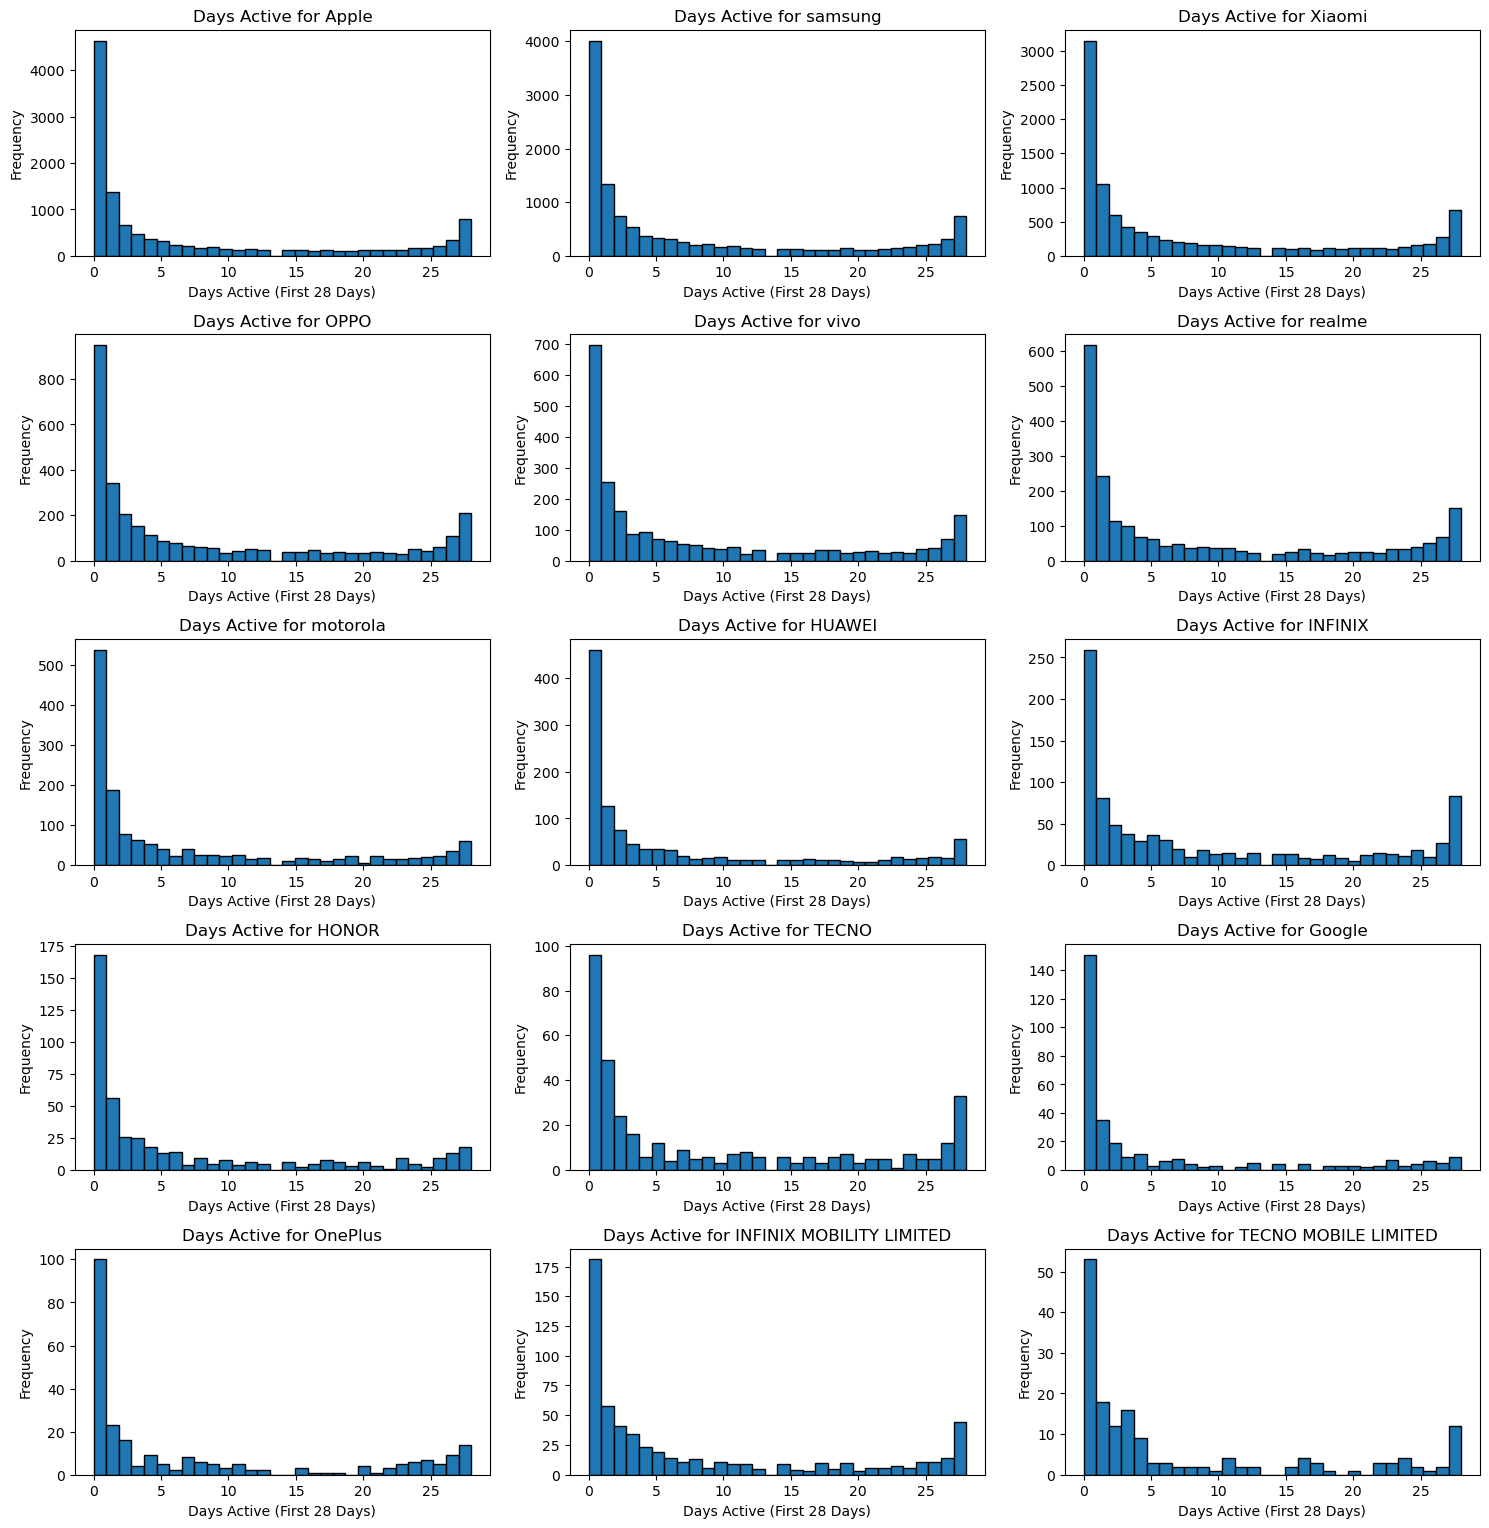

In [78]:
import matplotlib.pyplot as plt

# Define a list of specific device manufacturers you want to plot
device_manufacturers = ['Apple', 'samsung', 'Xiaomi', 'OPPO', 'vivo', 'realme', 
                        'motorola', 'HUAWEI', 'INFINIX', 'HONOR', 'TECNO', 'Google', 
                        'OnePlus', 'INFINIX MOBILITY LIMITED', 'TECNO MOBILE LIMITED']

# Plot the histograms for each device manufacturer
plt.figure(figsize=(15, 18))  # Adjusted figure size to fit all histograms

# Adjust number of rows and columns in the grid
num_rows = 6  # 6 rows x 3 columns (for 18 plots)
num_columns = 3

for i, device in enumerate(device_manufacturers, 1):
    plt.subplot(num_rows, num_columns, i)  # Arrange in a 6x3 grid
    device_data = merged_df[merged_df['registration_device_manufacturer'] == device]
    plt.hist(device_data['days_active_first_28_days_after_registration'], bins=30, edgecolor='black')
    plt.title(f'Days Active for {device}')
    plt.xlabel('Days Active (First 28 Days)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()





In [79]:
# Get the top 10 most common device manufacturers
top_10_manufacturers = merged_df['registration_device_manufacturer'].value_counts().head(10).index

# Initialize a dictionary to store results
zero_percentages = {}

# Calculate percentage of 0s for each manufacturer
for manufacturer in top_10_manufacturers:
    manufacturer_data = merged_df[merged_df['registration_device_manufacturer'] == manufacturer]
    zero_percentage = (manufacturer_data['days_active_first_28_days_after_registration'] == 0).mean() * 100
    zero_percentages[manufacturer] = zero_percentage

# Display the results
for manufacturer, percentage in zero_percentages.items():
    print(f"Percentage of 0 days active for {manufacturer}: {percentage:.2f}%")


Percentage of 0 days active for Apple: 38.47%
Percentage of 0 days active for samsung: 33.97%
Percentage of 0 days active for Xiaomi: 32.52%
Percentage of 0 days active for OPPO: 30.43%
Percentage of 0 days active for vivo: 30.33%
Percentage of 0 days active for realme: 29.78%
Percentage of 0 days active for motorola: 36.68%
Percentage of 0 days active for HUAWEI: 40.39%
Percentage of 0 days active for INFINIX: 29.40%
Percentage of 0 days active for INFINIX MOBILITY LIMITED: 31.05%


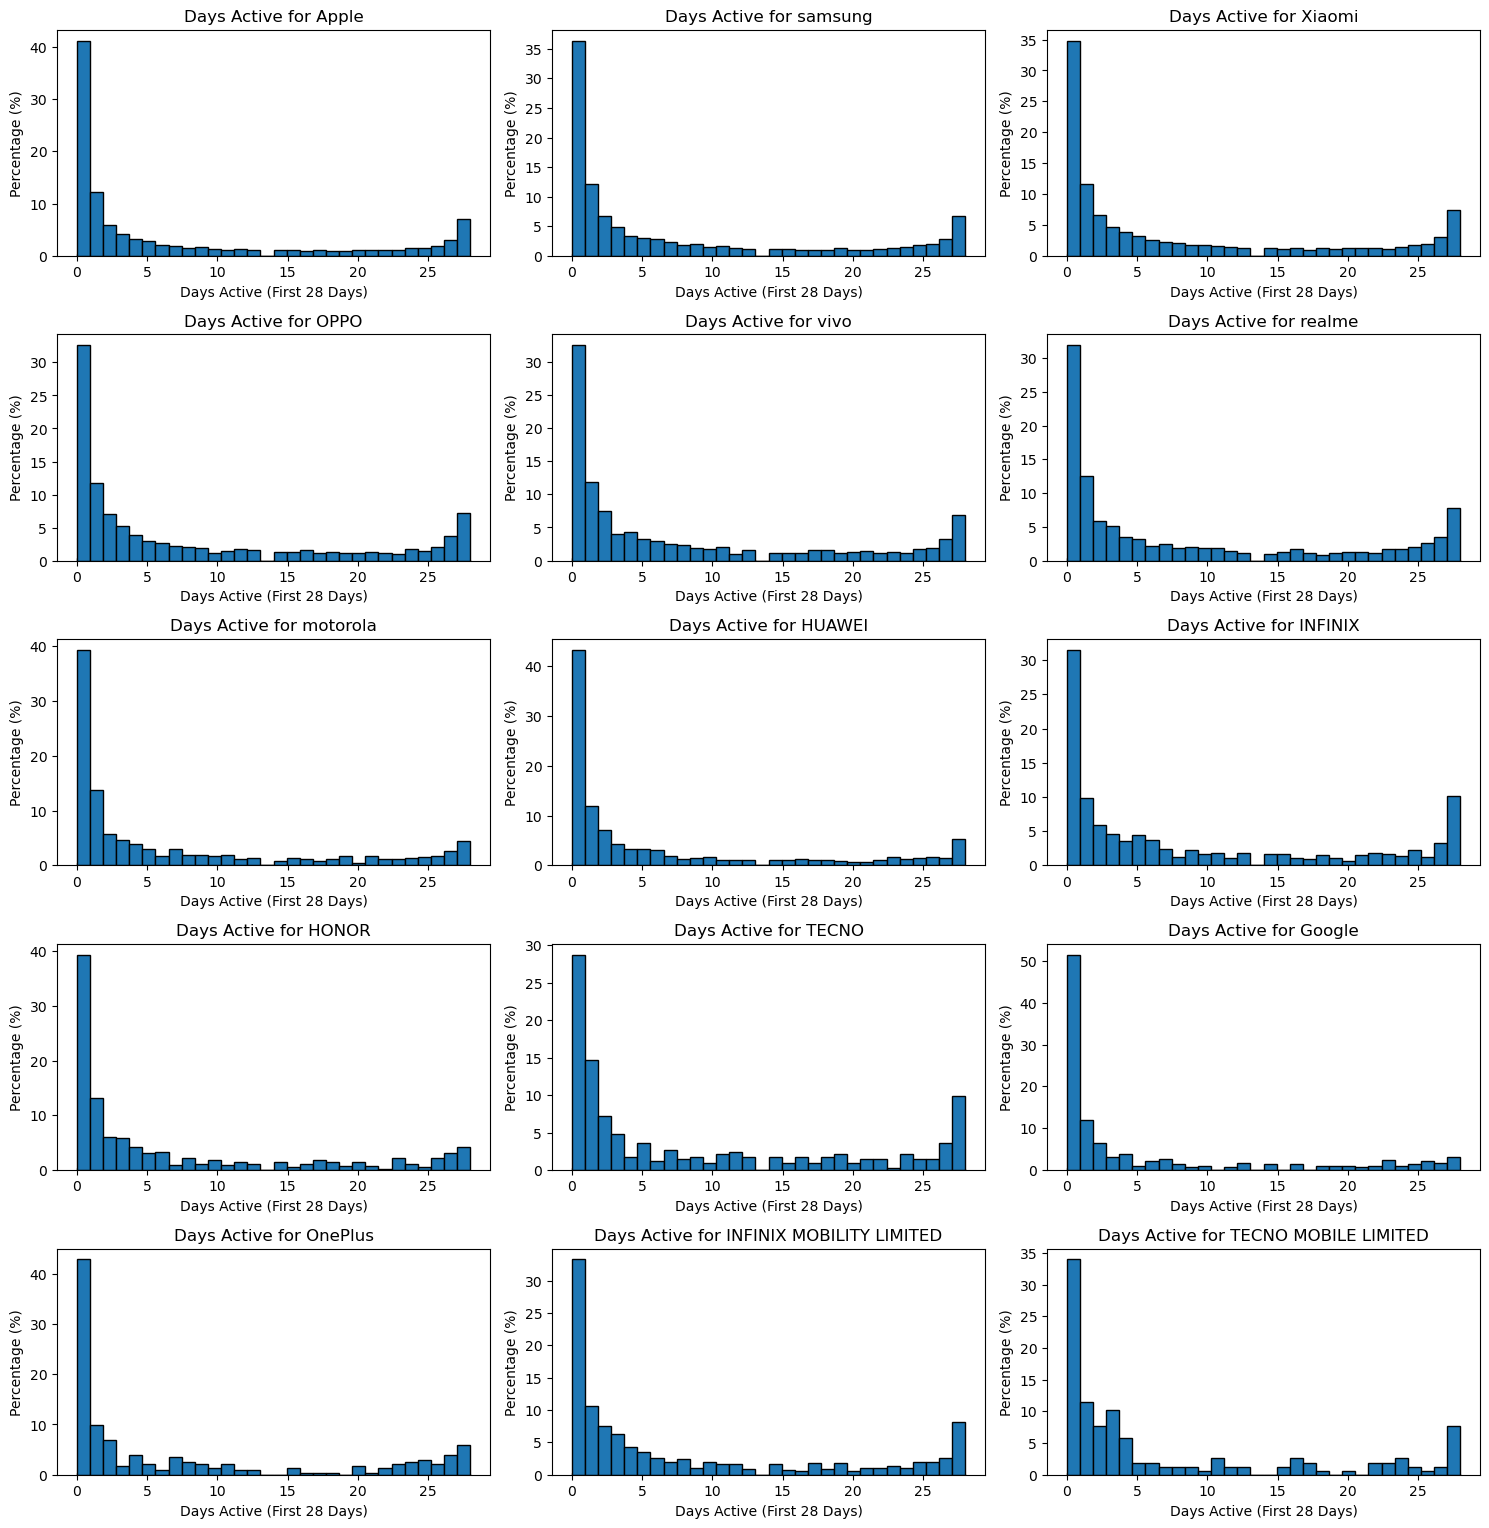

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Define a list of specific device manufacturers you want to plot
device_manufacturers = ['Apple', 'samsung', 'Xiaomi', 'OPPO', 'vivo', 'realme', 
                        'motorola', 'HUAWEI', 'INFINIX', 'HONOR', 'TECNO', 'Google', 
                        'OnePlus', 'INFINIX MOBILITY LIMITED', 'TECNO MOBILE LIMITED']

# Plot the histograms for each device manufacturer
plt.figure(figsize=(15, 18))  # Adjusted figure size to fit all histograms

# Adjust number of rows and columns in the grid
num_rows = 6  # 6 rows x 3 columns (for 18 plots)
num_columns = 3

for i, device in enumerate(device_manufacturers, 1):
    plt.subplot(num_rows, num_columns, i)  # Arrange in a 6x3 grid
    device_data = merged_df[merged_df['registration_device_manufacturer'] == device]
    
    # Calculate histogram values in percentages
    counts, bins, _ = plt.hist(device_data['days_active_first_28_days_after_registration'], 
                               bins=30, edgecolor='black', density=True)
    # Convert to percentages
    percentages = counts * 100
    
    # Redraw histogram with percentage values
    plt.bar(bins[:-1], percentages, width=np.diff(bins), edgecolor='black', align='edge')
    
    plt.title(f'Days Active for {device}')
    plt.xlabel('Days Active (First 28 Days)')
    plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()


In [81]:
# Get unique values and their counts for 'registration_store' and 'registration_platform_specific' columns

# Counts for 'registration_store'
store_counts = merged_df['registration_store'].value_counts()
print("Registration store counts:\n", store_counts)

# Counts for 'registration_platform_specific'
platform_specific_counts = merged_df['registration_platform_specific'].value_counts()
print("\nRegistration platform specific counts:\n", platform_specific_counts)


Registration store counts:
 registration_store
GooglePlay         36017
AppStore           12204
WindowsStore         755
Facebook             660
Huawei               253
GooglePlayForPC      105
Catappult              6
Name: count, dtype: int64

Registration platform specific counts:
 registration_platform_specific
Android Phone          34799
iOS Phone              10895
Android Tablet          1582
iOS Tablet              1309
UniversalWindows PC      755
WebGL FB Canvas          415
WebGL TE Site            245
Name: count, dtype: int64


In [82]:
# Sort the filtered results by the number of people in descending order
filtered_country_stats_sorted = filtered_country_stats.sort_values(by='count_of_people', ascending=False)

# Display the sorted results
print("Filtered country stats (ordered by number of people):")
print(filtered_country_stats_sorted)





Filtered country stats (ordered by number of people):
                        count_of_people  percentage_of_zeros
registration_country                                        
Indonesia                         12018            28.540523
Turkey                             4472            33.027728
Brazil                             3067            39.843495
Germany                            2130            39.765258
United Kingdom                     1700            46.176471
France                             1619            39.654107
Thailand                           1544            30.829016
Italy                              1339            42.867812
Spain                              1236            39.967638
Malaysia                           1162            30.034423
Poland                             1160            35.689655
United States                       951            39.537329
Argentina                           852            39.084507
Greece                         

In [83]:
# Create new columns with 'Other' for rare values in 'registration_store' and 'registration_platform_specific'

# For 'registration_store'
store_counts = merged_df['registration_store'].value_counts()
merged_df['registration_store_cleaned'] = merged_df['registration_store'].apply(lambda x: x if store_counts[x] >= 1000 else 'Other')

# For 'registration_platform_specific'
platform_counts = merged_df['registration_platform_specific'].value_counts()
merged_df['registration_platform_specific_cleaned'] = merged_df['registration_platform_specific'].apply(lambda x: x if platform_counts[x] >= 1000 else 'Other')

# Remove original columns
merged_df = merged_df.drop(columns=['registration_store', 'registration_platform_specific'])

# Display updated counts to confirm
updated_store_counts = merged_df['registration_store_cleaned'].value_counts()
updated_platform_counts = merged_df['registration_platform_specific_cleaned'].value_counts()

print("Updated registration store counts:\n", updated_store_counts)
print("\nUpdated registration platform specific counts:\n", updated_platform_counts)





Updated registration store counts:
 registration_store_cleaned
GooglePlay    36017
AppStore      12204
Other          1779
Name: count, dtype: int64

Updated registration platform specific counts:
 registration_platform_specific_cleaned
Android Phone     34799
iOS Phone         10895
Android Tablet     1582
Other              1415
iOS Tablet         1309
Name: count, dtype: int64


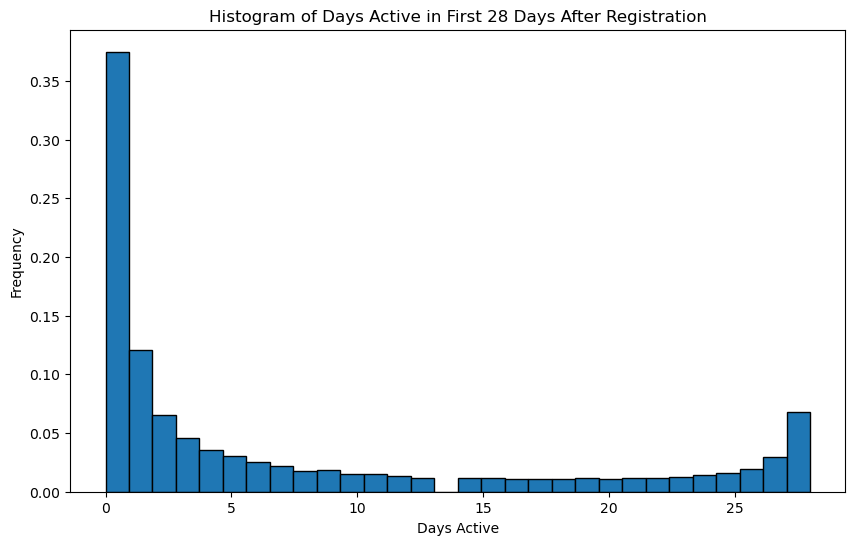

In [84]:
# Importing the required library
import matplotlib.pyplot as plt

# Plot histogram for the target variable 'days_active_first_28_days_after_registration'
plt.figure(figsize=(10, 6))
plt.hist(merged_df['days_active_first_28_days_after_registration'], bins=30, edgecolor='black', density= True)
plt.title('Histogram of Days Active in First 28 Days After Registration')
plt.xlabel('Days Active')
plt.ylabel('Frequency')
plt.show()


In [85]:
# Remove the 'registration_country' column
merged_df = merged_df.drop(columns=['registration_country'])
merged_df = merged_df.drop(columns=['registration_device_manufacturer']) 
# Display the first few rows to confirm the column has been removed
print(merged_df.head())


   user_id  registration_season_day registration_channel_detailed  \
0        5                        7                       Organic   
1        7                       27                       Unknown   
2       13                       13                       Organic   
3       23                       13                          Paid   
4       25                       28                       Organic   

  registration_device_type  session_count  playtime  number_of_devices_used  \
0                    Phone              1    141062                       1   
1                    Phone              1    521754                       1   
2                    Phone              2   1703183                       1   
3                    Phone              4   3181700                       1   
4                    Phone              5   5866921                       1   

   total_match_played_count  total_match_won_count  total_match_watched_count  \
0                         2  

In [86]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = merged_df.drop(columns=['days_active_first_28_days_after_registration'])
y = merged_df['days_active_first_28_days_after_registration']


# First split into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split training+validation set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)  # 0.1765 * 85% ≈ 15%


In [87]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric features in training set, and transform validation and test sets
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [88]:
# Drop rows where 'avg_age_top_11_players' is NaN
merged_df.dropna(subset=['avg_age_top_11_players'], inplace=True)



In [89]:
import pandas as pd

# Convert X_train and y_train to DataFrames (assuming X_train is a numpy array)
X_train_df = pd.DataFrame(X_train)  # Creates DataFrame from X_train array
y_train_df = pd.DataFrame(y_train, columns=['days_active_first_28_days_after_registration'])

# Display the first few rows of X_train and y_train
print("X_train sample:")
print(X_train_df.head())

print("\ny_train sample:")
print(y_train_df.head())

# Display structure and NaN/infinite value checks
print("\nX_train summary:")
print(X_train_df.info())
print("\nNaN values in X_train:", X_train_df.isnull().sum().sum())
print("\nInfinite values in X_train:", (X_train_df == float('inf')).sum().sum())

print("\nSummary of y_train:")
print(y_train_df.describe())



X_train sample:
        user_id  registration_season_day registration_channel_detailed  \
29615  0.318457                -0.578095                       Organic   
5274  -1.364013                 0.165307                       Organic   
32316  0.509669                 1.280410                       Organic   
25062 -0.000493                 1.032609                       Organic   
18975 -0.415088                -1.445398                          Paid   

      registration_device_type  session_count  playtime  \
29615                   Tablet       0.363734 -0.634563   
5274                     Phone      -0.600256 -0.082543   
32316                       PC      -0.118261 -0.362929   
25062                    Phone      -0.118261 -0.307986   
18975                    Phone       0.845729  2.353785   

       number_of_devices_used  total_match_played_count  \
29615               -0.023537                 -0.005630   
5274                -0.023537                 -0.005630   
32316  

In [90]:
import pandas as pd

# Convert X_train and y_train to DataFrames (assuming X_train is a numpy array)
X_test_df = pd.DataFrame(X_test)  # Creates DataFrame from X_train array
y_test_df = pd.DataFrame(y_test, columns=['days_active_first_28_days_after_registration'])

# Display the first few rows of X_train and y_train
print("X_train sample:")
print(X_test_df.head())

print("\ny_train sample:")
print(y_test_df.head())

# Display structure and NaN/infinite value checks
print("\nX_train summary:")
print(X_test_df.info())
print("\nNaN values in X_train:", X_test_df.isnull().sum().sum())
print("\nInfinite values in X_train:", (X_test_df == float('inf')).sum().sum())

print("\nSummary of y_train:")
print(y_test_df.describe())

X_train sample:
        user_id  registration_season_day registration_channel_detailed  \
33553  0.602151                 1.156509                          Paid   
9427  -1.083593                 1.156509                       Organic   
199   -1.724609                -1.321498                          Paid   
12447 -0.871029                 0.413107                          Paid   
39489  1.007161                -1.569298                          Paid   

      registration_device_type  session_count  playtime  \
33553                    Phone      -0.600256 -0.682284   
9427                     Phone      -0.600256 -0.481425   
199                      Phone       1.327725  0.154665   
12447                    Phone       3.737700  5.241274   
39489                    Phone      -0.600256 -0.756802   

       number_of_devices_used  total_match_played_count  \
33553               -0.023537                 -0.005630   
9427                -0.023537                 -0.005630   
199    

In [91]:
# Identify categorical columns automatically
categorical_columns = X_train_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Identified categorical columns:")
print(categorical_columns)


Identified categorical columns:
['registration_channel_detailed', 'registration_device_type', 'region', 'registration_store_cleaned', 'registration_platform_specific_cleaned']


In [92]:
import pandas as pd

# Remove the 'user_id' column
X_train_df = X_train_df.drop(columns=['user_id'])

# Automatically find categorical columns in the DataFrame
categorical_columns = X_train_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply one-hot encoding to the categorical columns
X_train_df = pd.get_dummies(X_train_df, columns=categorical_columns, drop_first=True)

# Verify the result
print("X_train after encoding:")
print(X_train_df.head())

print("\nX_train shape after encoding:", X_train_df.shape)



X_train after encoding:
       registration_season_day  session_count  playtime  \
29615                -0.578095       0.363734 -0.634563   
5274                  0.165307      -0.600256 -0.082543   
32316                 1.280410      -0.118261 -0.362929   
25062                 1.032609      -0.118261 -0.307986   
18975                -1.445398       0.845729  2.353785   

       number_of_devices_used  total_match_played_count  \
29615               -0.023537                 -0.005630   
5274                -0.023537                 -0.005630   
32316               -0.023537                 -0.619431   
25062               -0.023537                 -0.619431   
18975               -0.023537                  1.835773   

       total_match_won_count  total_match_watched_count  \
29615               0.241031                  -0.374898   
5274                0.241031                   0.674925   
32316              -0.578198                  -0.374898   
25062              -0.578198  

In [93]:
# Convert all columns in X_train_df to numeric, coerce errors to NaN (then recheck for any NaNs if needed)
X_train_df = X_train_df.apply(pd.to_numeric, errors='coerce')

# Verify that all data is numeric
print(X_train_df.dtypes)


registration_season_day                                  float64
session_count                                            float64
playtime                                                 float64
number_of_devices_used                                   float64
total_match_played_count                                 float64
                                                          ...   
registration_store_cleaned_Other                            bool
registration_platform_specific_cleaned_Android Tablet       bool
registration_platform_specific_cleaned_Other                bool
registration_platform_specific_cleaned_iOS Phone            bool
registration_platform_specific_cleaned_iOS Tablet           bool
Length: 77, dtype: object


In [94]:
# Convert all columns in X_train_df to numeric, coerce errors to NaN (then recheck for any NaNs if needed)
X_test_df = X_test_df.apply(pd.to_numeric, errors='coerce')

# Verify that all data is numeric
print(X_test_df.dtypes)

user_id                                   float64
registration_season_day                   float64
registration_channel_detailed             float64
registration_device_type                  float64
session_count                             float64
playtime                                  float64
number_of_devices_used                    float64
total_match_played_count                  float64
total_match_won_count                     float64
total_match_watched_count                 float64
transaction_count_iap                     float64
transaction_count_rewarded_video          float64
tokens_spent                              float64
tokens_stash                              float64
tokens_bought                             float64
rests_stash                               float64
rests_spent                               float64
treatments_spent                          float64
morale_spent                              float64
money_stash                               float64


In [95]:
# Check for NaN values
print("NaN values in X_train_df after conversion:", X_train_df.isnull().sum().sum())

# If there are any NaNs, you can fill them with a constant value, like 0
X_train_df.fillna(0, inplace=True)


NaN values in X_train_df after conversion: 1


In [96]:
# Check for NaN values
print("NaN values in X_train_df after conversion:", X_train_df.isnull().sum().sum())

# If there are any NaNs, you can fill them with a constant value, like 0
X_test_df.fillna(0, inplace=True)

NaN values in X_train_df after conversion: 0


In [97]:
# Fill any remaining NaN values with 0
X_train_df.fillna(0, inplace=True)

# Or, if you prefer to fill with the column mean:
# X_train_df.fillna(X_train_df.mean(), inplace=True)
X_test_df.fillna(0, inplace=True)


In [98]:
# Convert boolean columns to integers (0 or 1)
X_train_df = X_train_df.astype({col: 'int' for col in X_train_df.select_dtypes('bool').columns})

# Verify conversion
print(X_train_df.dtypes)  # All should now be float64 or int64


# Convert boolean columns to integers (0 or 1)
X_test_df = X_test_df.astype({col: 'int' for col in X_test_df.select_dtypes('bool').columns})

# Verify conversion
print(X_test_df.dtypes)  # All should now be float64 or int64


registration_season_day                                  float64
session_count                                            float64
playtime                                                 float64
number_of_devices_used                                   float64
total_match_played_count                                 float64
                                                          ...   
registration_store_cleaned_Other                           int64
registration_platform_specific_cleaned_Android Tablet      int64
registration_platform_specific_cleaned_Other               int64
registration_platform_specific_cleaned_iOS Phone           int64
registration_platform_specific_cleaned_iOS Tablet          int64
Length: 77, dtype: object
user_id                                   float64
registration_season_day                   float64
registration_channel_detailed             float64
registration_device_type                  float64
session_count                             float64
playtime 

In [99]:
# Create a binary target variable: 1 if non-zero, 0 if zero
y_train_class = (y_train > 0).astype(int)
y_val_class = (y_val > 0).astype(int)
y_test_class = (y_test > 0).astype(int)


In [100]:
# Check data types of the encoded data
print("Data types after one-hot encoding:")
print(X_train.dtypes)

# Verify if any column is still an object
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns after encoding:", non_numeric_columns)


Data types after one-hot encoding:
user_id                                   float64
registration_season_day                   float64
registration_channel_detailed              object
registration_device_type                   object
session_count                             float64
playtime                                  float64
number_of_devices_used                    float64
total_match_played_count                  float64
total_match_won_count                     float64
total_match_watched_count                 float64
transaction_count_iap                     float64
transaction_count_rewarded_video          float64
tokens_spent                              float64
tokens_stash                              float64
tokens_bought                             float64
rests_stash                               float64
rests_spent                               float64
treatments_spent                          float64
morale_spent                              float64
money_stash    

In [101]:
# List of columns to be one-hot encoded
categorical_columns = ['registration_channel_detailed', 'registration_device_type', 
                       'region', 'registration_store_cleaned', 'registration_platform_specific_cleaned']

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Check the data types again after encoding
print("Data types after one-hot encoding:")
print(X_train_encoded.dtypes)

# Verify that no object columns are left
non_numeric_columns_after_encoding = X_train_encoded.select_dtypes(include=['object']).columns
print("Non-numeric columns after encoding:", non_numeric_columns_after_encoding)


Data types after one-hot encoding:
user_id                                                  float64
registration_season_day                                  float64
session_count                                            float64
playtime                                                 float64
number_of_devices_used                                   float64
                                                          ...   
registration_store_cleaned_Other                            bool
registration_platform_specific_cleaned_Android Tablet       bool
registration_platform_specific_cleaned_Other                bool
registration_platform_specific_cleaned_iOS Phone            bool
registration_platform_specific_cleaned_iOS Tablet           bool
Length: 78, dtype: object
Non-numeric columns after encoding: Index([], dtype='object')


In [102]:
# Ensure that boolean columns are converted to integers (0 or 1)
X_train_encoded = X_train_encoded.astype({col: 'int' for col in X_train_encoded.select_dtypes('bool').columns})
X_val_encoded = X_val_encoded.astype({col: 'int' for col in X_val_encoded.select_dtypes('bool').columns})
X_test_encoded = X_test_encoded.astype({col: 'int' for col in X_test_encoded.select_dtypes('bool').columns})

# Check the data types again after converting booleans
print("Data types after converting booleans:")
print(X_train_encoded.dtypes)


Data types after converting booleans:
user_id                                                  float64
registration_season_day                                  float64
session_count                                            float64
playtime                                                 float64
number_of_devices_used                                   float64
                                                          ...   
registration_store_cleaned_Other                           int64
registration_platform_specific_cleaned_Android Tablet      int64
registration_platform_specific_cleaned_Other               int64
registration_platform_specific_cleaned_iOS Phone           int64
registration_platform_specific_cleaned_iOS Tablet          int64
Length: 78, dtype: object


In [103]:
X_train_encoded.head()

,user_id,registration_season_day,session_count,playtime,number_of_devices_used,total_match_played_count,total_match_won_count,total_match_watched_count,transaction_count_iap,transaction_count_rewarded_video,...,region_Thailand,region_Turkey,region_United Kingdom,region_United States,registration_store_cleaned_GooglePlay,registration_store_cleaned_Other,registration_platform_specific_cleaned_Android Tablet,registration_platform_specific_cleaned_Other,registration_platform_specific_cleaned_iOS Phone,registration_platform_specific_cleaned_iOS Tablet
29615,0.318457,-0.578095,0.363734,-0.634563,-0.023537,-0.005630,0.241031,-0.374898,-0.082801,-0.314230,...,0,0,0,0,1,0,1,0,0,0
5274,-1.364013,0.165307,-0.600256,-0.082543,-0.023537,-0.005630,0.241031,0.674925,-0.082801,-0.314230,...,0,0,0,1,0,0,0,0,1,0
32316,0.509669,1.280410,-0.118261,-0.362929,-0.023537,-0.619431,-0.578198,-0.374898,-0.082801,-0.314230,...,0,0,0,0,0,1,0,1,0,0
25062,-0.000493,1.032609,-0.118261,-0.307986,-0.023537,-0.619431,-0.578198,-0.374898,-0.082801,-0.314230,...,0,0,0,0,1,0,0,0,0,0
18975,-0.415088,-1.445398,0.845729,2.353785,-0.023537,1.835773,1.060259,1.724749,-0.082801,0.137846,...,1,0,0,0,1,0,0,0,0,0


In [104]:
# Check if 'user_id' exists in each dataset before trying to drop it
if 'user_id' in X_train_encoded.columns:
    X_train_encoded = X_train_encoded.drop(columns=['user_id'])

if 'user_id' in X_val_encoded.columns:
    X_val_encoded = X_val_encoded.drop(columns=['user_id'])

if 'user_id' in X_test_encoded.columns:
    X_test_encoded = X_test_encoded.drop(columns=['user_id'])

# Now we can proceed with the rest of the data processing
print("Data after removing 'user_id' columns:")
print(X_train_encoded.head())



Data after removing 'user_id' columns:
       registration_season_day  session_count  playtime  \
29615                -0.578095       0.363734 -0.634563   
5274                  0.165307      -0.600256 -0.082543   
32316                 1.280410      -0.118261 -0.362929   
25062                 1.032609      -0.118261 -0.307986   
18975                -1.445398       0.845729  2.353785   

       number_of_devices_used  total_match_played_count  \
29615               -0.023537                 -0.005630   
5274                -0.023537                 -0.005630   
32316               -0.023537                 -0.619431   
25062               -0.023537                 -0.619431   
18975               -0.023537                  1.835773   

       total_match_won_count  total_match_watched_count  \
29615               0.241031                  -0.374898   
5274                0.241031                   0.674925   
32316              -0.578198                  -0.374898   
25062          

In [106]:
# Ensure all features are numeric
X_train_scaled = X_train_encoded.astype(np.float64)
X_val_scaled = X_val_encoded.astype(np.float64)
X_test_scaled = X_test_encoded.astype(np.float64)


In [108]:
# Check for NaN or infinite values
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Infinite values in X_train_scaled:", np.isinf(X_train_scaled).sum())


NaN values in X_train_scaled: registration_season_day                                  0
session_count                                            0
playtime                                                 0
number_of_devices_used                                   0
total_match_played_count                                 0
                                                        ..
registration_store_cleaned_Other                         0
registration_platform_specific_cleaned_Android Tablet    0
registration_platform_specific_cleaned_Other             0
registration_platform_specific_cleaned_iOS Phone         0
registration_platform_specific_cleaned_iOS Tablet        0
Length: 77, dtype: int64
Infinite values in X_train_scaled: registration_season_day                                  0
session_count                                            0
playtime                                                 0
number_of_devices_used                                   0
total_match_played_count 

In [109]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (or other strategies)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit the imputer on the training set and transform all datasets
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_val_imputed = imputer.transform(X_val_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Check if NaN values are still present after imputation
print("NaN values in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("Infinite values in X_train_imputed:", np.isinf(X_train_imputed).sum())


NaN values in X_train_imputed: 0
Infinite values in X_train_imputed: 0


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf


# Normalize input data
scaler = StandardScaler()
X_train_imputed = scaler.fit_transform(X_train_imputed)
X_val_imputed = scaler.transform(X_val_imputed)
X_test_imputed = scaler.transform(X_test_imputed)

# Step 1: Random Forest for zero vs. non-zero classification
y_train_binary = (y_train > 0).astype(int)
y_val_binary = (y_val > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Perform Grid Search for Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_imputed, y_train_binary)

# Best Random Forest model from Grid Search
best_rf_classifier = grid_search.best_estimator_
print(f"Best parameters for RF Classifier: {grid_search.best_params_}")

# Predict on the training, validation, and test sets
y_train_pred_class = best_rf_classifier.predict(X_train_imputed)
y_val_pred_class = best_rf_classifier.predict(X_val_imputed)
y_test_pred_class = best_rf_classifier.predict(X_test_imputed)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train_binary, y_train_pred_class)
val_accuracy = accuracy_score(y_val_binary, y_val_pred_class)
test_accuracy = accuracy_score(y_test_binary, y_test_pred_class)

conf_matrix_train = confusion_matrix(y_train_binary, y_train_pred_class)
conf_matrix_val = confusion_matrix(y_val_binary, y_val_pred_class)
conf_matrix_test = confusion_matrix(y_test_binary, y_test_pred_class)

print(f"Training Accuracy (RF Classifier): {train_accuracy}")
print(f"Validation Accuracy (RF Classifier): {val_accuracy}")
print(f"Test Accuracy (RF Classifier): {test_accuracy}")
print("Confusion Matrix - Training:")
print(conf_matrix_train)
print("Confusion Matrix - Validation:")
print(conf_matrix_val)
print("Confusion Matrix - Test:")
print(conf_matrix_test)

# Step 2: ANN for regression on non-zero cases
# Filter non-zero cases
non_zero_indices_train = y_train > 0
non_zero_indices_val = y_val > 0
non_zero_indices_test = y_test > 0

X_train_non_zero = X_train_imputed[non_zero_indices_train]
y_train_non_zero = y_train[non_zero_indices_train]
X_val_non_zero = X_val_imputed[non_zero_indices_val]
y_val_non_zero = y_val[non_zero_indices_val]
X_test_non_zero = X_test_imputed[non_zero_indices_test]
y_test_non_zero = y_test[non_zero_indices_test]

# Define the ANN model for regression
regressor_model = Sequential([
    Dense(256, activation='relu', input_dim=X_train_non_zero.shape[1]),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='linear')
])

regressor_model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the ANN model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
regressor_model.fit(X_train_non_zero, y_train_non_zero, epochs=50, batch_size=32, 
                    validation_data=(X_val_non_zero, y_val_non_zero), 
                    callbacks=[early_stopping], verbose=1)

# Predict on the full datasets using the two-step approach
y_train_pred = np.zeros_like(y_train, dtype=float)
y_val_pred = np.zeros_like(y_val, dtype=float)
y_test_pred = np.zeros_like(y_test, dtype=float)

# Use ANN predictions for non-zero cases
y_train_pred[non_zero_indices_train] = regressor_model.predict(X_train_non_zero).flatten()
y_val_pred[non_zero_indices_val] = regressor_model.predict(X_val_non_zero).flatten()
y_test_pred[non_zero_indices_test] = regressor_model.predict(X_test_non_zero).flatten()

# Evaluate the combined model using MAE and MSE
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MAE (Combined Model): {train_mae}")
print(f"Validation MAE (Combined Model): {val_mae}")
print(f"Test MAE (Combined Model): {test_mae}")
print(f"Training MSE (Combined Model): {train_mse}")
print(f"Validation MSE (Combined Model): {val_mse}")
print(f"Test MSE (Combined Model): {test_mse}")



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for RF Classifier: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy (RF Classifier): 0.9803988799359964
Validation Accuracy (RF Classifier): 0.7735270594508131
Test Accuracy (RF Classifier): 0.7770666666666667
Confusion Matrix - Training:
[[12151   142]
 [  544 22161]]
Confusion Matrix - Validation:
[[1724  871]
 [ 828 4079]]
Confusion Matrix - Test:
[[1751  852]
 [ 820 4077]]
Epoch 1/50


/Users/ognjenradojicic/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 9.7827 - val_loss: 7.4971
Epoch 2/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.4505 - val_loss: 7.3595
Epoch 3/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.3369 - val_loss: 7.2965
Epoch 4/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.2374 - val_loss: 7.2832
Epoch 5/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0637 - val_loss: 7.2559
Epoch 6/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0837 - val_loss: 7.2220
Epoch 7/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.9928 - val_loss: 7.2739
Epoch 8/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0095 - val_loss: 7.2360
Epoch 9/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.9793 - val_loss: 7.2415
Epoch 10/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0005 - val_loss: 7.2238
Epoch 11/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.8969 - val_loss: 7.2102
Epoch 12/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.

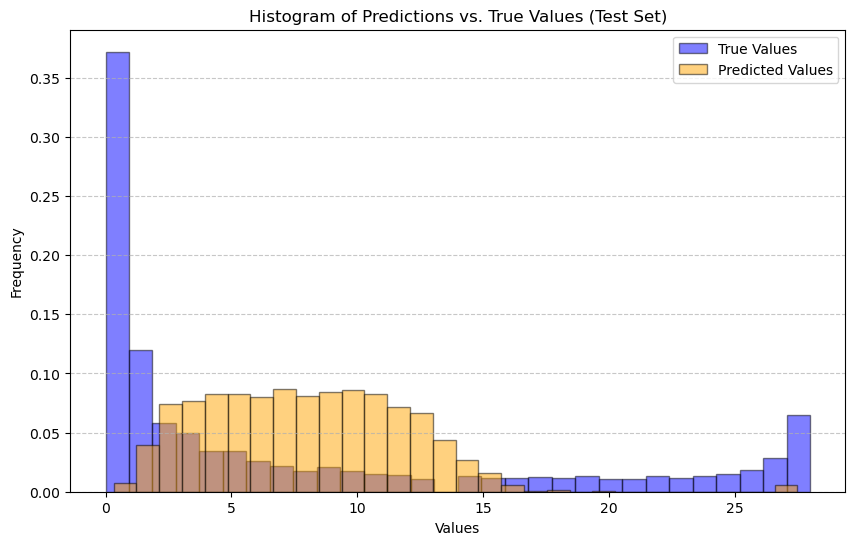

In [158]:
import matplotlib.pyplot as plt

# Plot histogram of predictions vs. actual values for the test set
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='True Values', edgecolor='black', color='blue', density= True)
plt.hist(y_test_pred, bins=30, alpha=0.5, label='Predicted Values', edgecolor='black', color='orange', density= True)
plt.title("Histogram of Predictions vs. True Values (Test Set)")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [159]:
import numpy as np

# Ensure y_test and y_test_pred are NumPy arrays
y_test = np.array(y_test)
y_test_pred = np.array(y_test_pred)

# Identify indices where the true values are 27 or 28
high_value_indices = np.where((y_test == 0) | (y_test == 1))[0]

# Print the actual and predicted values for these cases
print("True vs Predicted Values for Test Cases with True Values 27 and 28:")
for idx in high_value_indices:
    print(f"True: {y_test[idx]}, Predicted: {y_test_pred[idx]}")



True vs Predicted Values for Test Cases with True Values 27 and 28:
True: 0, Predicted: 8.158708572387695
True: 0, Predicted: 8.902140617370605
True: 0, Predicted: 1.2433847188949585
True: 0, Predicted: 6.9640889167785645
True: 0, Predicted: 5.73846960067749
True: 0, Predicted: 10.02902889251709
True: 0, Predicted: 4.447942733764648
True: 1, Predicted: 7.601720333099365
True: 0, Predicted: 1.851353645324707
True: 1, Predicted: 9.464091300964355
True: 0, Predicted: 10.456323623657227
True: 0, Predicted: 7.208031177520752
True: 0, Predicted: 8.955621719360352
True: 0, Predicted: 4.180151462554932
True: 0, Predicted: 4.9821014404296875
True: 0, Predicted: 11.003546714782715
True: 0, Predicted: 8.145194053649902
True: 0, Predicted: 8.648776054382324
True: 0, Predicted: 8.909210205078125
True: 0, Predicted: 8.416650772094727
True: 1, Predicted: 4.985706329345703
True: 0, Predicted: 2.4244723320007324
True: 0, Predicted: 7.538281440734863
True: 0, Predicted: 3.1317570209503174
True: 0, Predi

Actual vs Predicted Values for 15 Test Samples:
Actual: 3.00, Predicted: 0.05
Actual: 0.00, Predicted: 0.01
Actual: 20.00, Predicted: 9.38
Actual: 2.00, Predicted: 1.71
Actual: 0.00, Predicted: 0.20
Actual: 0.00, Predicted: 0.02
Actual: 28.00, Predicted: 2.47
Actual: 11.00, Predicted: 3.65
Actual: 1.00, Predicted: 2.35
Actual: 28.00, Predicted: 4.77
Actual: 3.00, Predicted: 3.76
Actual: 0.00, Predicted: 1.75
Actual: 3.00, Predicted: 0.20
Actual: 0.00, Predicted: 0.03
Actual: 0.00, Predicted: 0.05


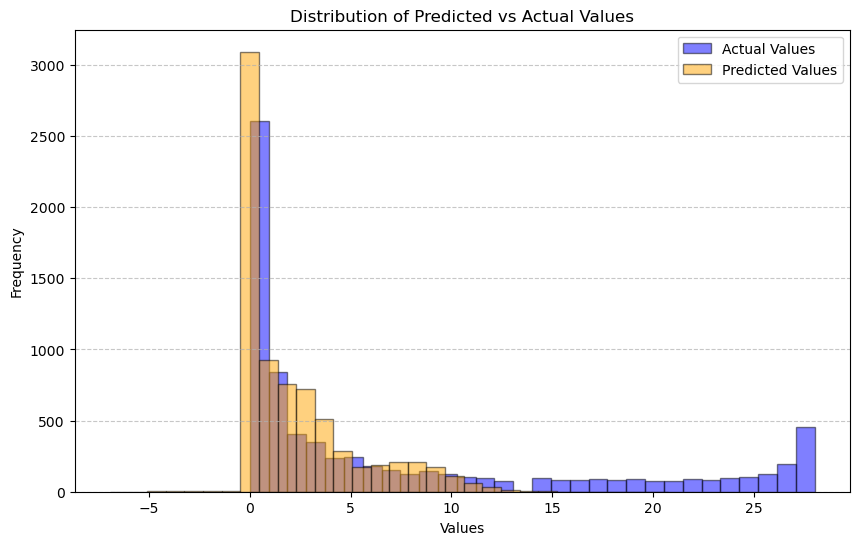

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Display actual vs predicted values for 15 random test samples
sample_indices = np.random.choice(len(y_test), 15, replace=False)  # Randomly select 15 indices
print("Actual vs Predicted Values for 15 Test Samples:")
for idx in sample_indices:
    print(f"Actual: {y_test[idx]:.2f}, Predicted: {y_test_pred[idx]:.2f}")

# Plot the distribution of actual values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Values', edgecolor='black', color='blue')
plt.hist(y_test_pred, bins=30, alpha=0.5, label='Predicted Values', edgecolor='black', color='orange')
plt.title("Distribution of Predicted vs Actual Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
